In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Student's t Distribution

We left off last class with the following result:  Suppose that the $Y_1, Y_2, \dots, Y_n$ is some sample of size $n$ pulled from a population that is normally distributed with an unkown mean $\mu$ and unkown variance $\sigma^2$. We then had the following results:

## $\bar{Y}$ 

The sample mean:  $$ \bar{Y} = \frac{1}{n} \sum Y_i $$ 

is a normally distributed random variable with mean $\mu$ and variance $\sigma^2 /n$.

## $S^2$ 

The sample variance:  $$ S^2 = \frac{1}{n-1} \sum (Y_i - \bar{Y})^2 $$

satisfies:  $$ \frac{(n-1) S^2}{\sigma^2} $$ 

is given by a $\chi^2$ distribution with $n-1$ degrees of freedom. $S^2$ and $\bar{Y}$ are also independent random variables.

## $T$

Again we would like to use the $Z$ statistic:

$$ Z = \sqrt{n} \frac{(\bar{Y} - \mu)}{\sigma} $$ 

to build confidence intervals about $\bar{Y}$ in which we predict $\mu$ will be because this will be a standard normal random variable. However the problem is we do not know $\sigma$. 

We can try to use $S$ to replace $\sigma$ but the issue is that while $\sigma$ is fixed, $S$ is itself a random variable. Which leads us to 

$$ T = \sqrt{n} \frac{ ( \bar{Y} - \mu)}{S} $$ 

which is a random variable given by the Student's t distribution with $n-1$ degrees of freedom. 

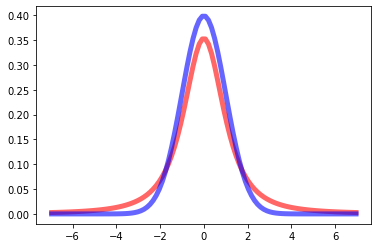

In [118]:
from scipy.stats import t
from scipy.stats import norm

df = 2
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
plt.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')
plt.plot(x, norm.pdf(x), 
         'b-', lw=5, alpha =0.6 )

### Students t distribution

Student's t distribution captures the idea that because $S$ is itself moving, we have a bit less certainity about the result. Hence the tails of the distribution are larger and the center of the distribution is smaller. As the size of the sample increases this effect becomes less noticeable and the t distribution approaches the standard normal distirbution. More or less two things are happening as the sample increases - the $S^2$ is a better approximation of the $\sigma^2$ and the variance of $\bar{Y}$ is getting small. 

### Example

We have the weight of five high school wrestlers: 150, 152, 155, 155, and 160. Assuming that these are sampled from a normal distirbution with unkown mean 𝜇 and unkown variance $\sigma^2$. Let's use use the students t distribution to find an interval about $\bar{Y}$ where we are 90% certain $\mu$ is located. 

In [4]:
# Compute Ybar

data = [150, 152, 155, 155, 160]
Ybar = sum(data) / 5
Ybar

154.4

In [5]:
# Compute S^2

S2 = sum( [(data[i] - Ybar)**2 for i in range(5) ] )/4
S2

14.299999999999999

In [6]:
S = np.sqrt(S2)
S

3.7815340802378072

In [122]:
# Find the interval of the t distribution centered on the mean in which 90% of the values are contained.

# We use ppf to find the inverse of the cdf: Note that you need to pass it the number of degrees of freedom.

t.ppf(0.95, 4)

2.13184678133629

In [8]:
# It is worth using the cdf to check that we have this correct:

t.cdf(2.13185, 4) - t.cdf(-2.13185, 4)

0.9000003613774656

In [9]:
# It is worth pausing here and comparing this value to the standard normal value we would use if we knew sigma:

norm.ppf(0.95)

1.6448536269514722

So putting everything together, we have 90% confidence that the value of mu will satisfy:

$$ -2.13185 < \sqrt{5} \frac{\bar{Y} - \mu}{S} < 2.13185 $$

We then solve this inequality for $\mu$:

$$ \frac{-2.13185 S}{\sqrt{5}} + \bar{Y} < \mu < \frac{2.13185 S}{\sqrt{5}} + \bar{Y} $$


In [10]:
-2.13185*S/np.sqrt(5) + Ybar, 2.13185*S/np.sqrt(5) + Ybar

(150.79471451222653, 158.00528548777348)

In [11]:
# Note if we knew that S = \sigma we would have found the interval from the standard normal result

-1.65*S/np.sqrt(5) + Ybar, 1.65*S/np.sqrt(5) + Ybar

(151.60959680332752, 157.1904031966725)

So the effect of not knowing $\sigma$ is increasing the size of our confidence interval by a bit less than 1.0 to both the left and the right. This is very sensistive to the degrees of freedom, and in practice we can usually forget about the t-distribution and just use a normal distribution once the sample is 30 or higher. 

On the other hand, that last statement is a relic of using tables for these computations. With a computer like we are using, there is no downside to just always using the t-distribution. It is not computationally more complex for our computer.

## What do we mean by 90% Confident

It is worth pausing here and discussing what we mean. The interval we have found represents the region where, 90% of the values of T will be. We can think of that as meaning, if we repeat this experiment 100 times, 90 of those times the value of $T$ will be between (-2.132, 2.132). So we can build from that the interval where we expect $\mu$ to be from one of those experiments and while we can't say this **IS** where $\mu$ is; what we can say is that if we do this process 100 times (i.e. build our sample and compute the itnerval), 90 of those times we expect the interval we construct to contain $\mu$.

**However** Note that this means 10 of those times we would (expect to) have an interval that **DOES NOT** contain $\mu$. 

So there is an ethical question hiding in here:  Is 90% confident, confident enough?

And as often happens in ethics and in the statistics and data science classes, the answer is *It depends*.  

We should ask about the consequences if we are wrong, we should ask about how often we expect this experiment to be repeated, and we should ask how expensive the experiment can be.

## Effect of Increase the Confidence

We could of course increase the confidence level, and in some cases we would want to. Say we wanted to be 99% confident?

In [123]:
t.ppf(0.995, 4)

4.604094871415897

In [126]:
t.cdf(4.6041, 4) - t.cdf(-4.6041, 4)

0.9900000386199301

4.6 is more than twice 2.13!  In order to be 90% confident we have to more than double the size of the resulting interval:

In [127]:
-4.6041*S/np.sqrt(5) + Ybar, 4.6041*S/np.sqrt(5) + Ybar

(146.61376038921227, 162.18623961078774)

Note that this is wider than the range of values in our sample!  

- Confidence level affects the size of the confidence interval, larger confidence is attained by a larger interval
- The Students t-distribution has large tails and so for large confidences we expect the size of the interval to increase rapidly.
- Increase the size of the sample improves things by moving the t-distribution closer to the normal distribution and decreasing the variance in the sample mean.

## Comparing two variances

Suppose that $W_1$ and $W_2$ are two indepdent $\chi^2$-distributed random variables with $\nu_1$ and $\nu_2$ degrees of freedom. Then 

$$ F = \frac{ W_1/\nu_1}{W_2 / \nu_2} $$ is said to have an F distribution with $\nu_1$ numerator degrees of freedom and $\nu_2$ denomoninator degrees of freedom. 

In practice this is used by connecting it back to the sample and population variances, the ratio of which is the respective $W_i/\nu_i$ in this result.

### Example 

Show that if we take independent samples of size $n_1 = 4$ and $n_2 = 8$ from two normal populations with the same variance, then find the upper bound $b$ such that 

$$ P( \frac{S_1^2}{S_2^2} < b ) = 0.95 $$

In [19]:
from scipy.stats import f

f.ppf(0.95, 3, 7)

4.346831399907815

In [20]:
f.cdf(4.347, 3, 7)

0.9500041782458821

This then gives us a test of whether two populations have the different variances or not. For example:

draw two small samples from two different normal distributions but with the same variance.

In [35]:
data1 = norm.rvs(size = 4)*4 + 10
data1

array([11.961342  , 12.12355757, 14.9505556 ,  6.00746586])

In [36]:
data2 = norm.rvs(size = 8)*4 + 100
data2

array([106.34632233, 109.60240461,  98.56063358, 103.11834166,
        98.71179633,  94.54515286, 100.12394169, 100.06129497])

In [37]:
Y1bar = sum(data1)/4
Y2bar = sum(data2)/8

Y1bar, Y2bar

(11.260730259325445, 101.3837360049498)

In [38]:
S1 = np.sqrt( sum( [ (data1[i] - Y1bar)**2 for i in range(4)])/3 )
S2 = np.sqrt( sum( [ (data2[i] - Y2bar)**2 for i in range(8)])/7 )

S1, S2

(3.7615123609616066, 4.786796629004853)

In [41]:
# Note we set up our probability above to test whether the ratio was too large not too small, so 
# shoudl take the ration of the larger sample variance over the smaller sample variance.  

# Also note that this is a random process and we are 95% certain we have the right interval; that
# means, if we repeat this experiement 100 times we expect to reach the wrong conclusion 5 times.

S2**2 / S1**2

1.619440388868239

Because this is less than 4.35 we have insufficient evidence to conclude that the first variance is bigger than the second. 

Whereas consider a 4 values sampled from a distribution with a different standard deviation:


In [98]:
data3 = norm.rvs(size = 4)*8 + 10
data3

array([19.18932303, 22.95754327, -6.77933283,  1.66829845])

In [99]:
Y3bar = sum(data3)/4
Y3bar

9.258957979441362

In [100]:
S3 = np.sqrt( sum( [ (data3[i] - Y3bar)**2 for i in range(4)])/3 )
S3

14.155190722061423

In [101]:
S3**2 / S2**2

8.744631188765783

# Central Limit Theorem

Okay this is all great. We now have a method of looking at samples from the normal distirbution with an unkown mean $\mu$ and using the sample mean $\bar{Y}$ to build confidence intervals in which we believe the ture value of the mean should be. We also have a method of adjusting our expectations to cases where we do not know the true value of $\sigma$. 

So that is all really great. However one might be getting worried at this point:

"Dr. Pierce. Are we going to have to do these calculations again for the Gamma Distribution and the Beta Distribution, and what about the Binomial and Poisson Distributions?"

To which, I can now let you know with great joy, that "No" we do not need to do that. And in fact it turns out that in most cases we do not even need to know what distribution we are even sampling from, provided that we have some freedom to choose a large enough sample.

## From the homework

You might recall, a couple of times now I have asked you to look at what happens as we sample from the exponential distribution.  Consider just using the sampling procedure:



In [102]:
from scipy.stats import expon

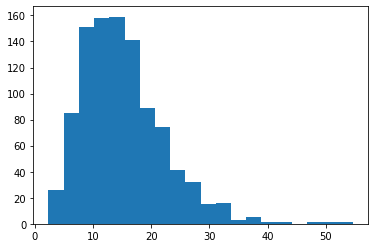

In [108]:
# Let's draw samples of size 5 (a relatively small sample), compute their mean, and then bin the results:
# from the exponential distribution with mean 15.

result = []

for k in range(1000):
    sample = expon.rvs(size = 5)*15
    result += [ sample.mean() ]
    
plt.hist(result, bins=20);

What we get is a *mound* shape that is slightly skewed.

What happens as we increase the size of the sample in the experiment?

## This Always Happens

The **Central Limit Theorem** states that:

If $Y_1, Y_2, \dots, Y_n$ are independent identically distributed random variables with $E(Y_i) = \mu$ and $V(Y_i) = \sigma^2$ then let

$$ U_n = \sqrt{n} \frac{\bar{Y} - \mu}{\sigma} $$

Then the distribution of the $U_n$ converges to the standard normal distribution function as $n\to \infty$. I.e. 

$$ \lim_{n\to \infty} P(U_n < u) = \int_{-\infty}^u \frac{1}{\sqrt{2\pi}} e^{-t^2/2} dt $$

### Discussion

Note a few things:

- We do not need to know anything about the distribution of $Y$ except that it has a well defined mean and variance: for example the theorem fails if we try to use the uniformly distributed *real numbers*. 
- While the limit of the distributions of $U_n$ is given, the rate at which these distributions converge is not: in fact this rate will depend on the distribution of the $Y_i$. 
- You might wondering why we phrased the last part in terms of the cummulative distribution functions:  Well because the theorem is true when the $Y$ are discrete, and thus the $U_n$ are discrete and do not have a density.

### Example

In the 2020 NHL Season, teams averaged 2.9 goals scored per game, with a standard deviation of 0.41 goals. The *Tampa Bay Lightning* played 21 games and averaged 3.5 goals scored per game. Can we conclude from the goals scored per game that they were a significantly better team the rest of the league?

In [114]:
U = np.sqrt(21)* (3.5 - 2.9)/0.41
U

6.706208334081719

In [115]:
# The probability that in a randomly selected set of 21 games the number of goals scored would average
# to more than 3.5 goals scored per game:

1 - norm.cdf(U)

9.987344284922983e-12

We have therefor very strong evidence that the Tampa Bay team was better than average in the league.

Another example from the same season:  the Dallas Stars played 19 games with 2.7 goals per game. Can we conclude that they were significantly worse than the league as a whole?

In [116]:
U = np.sqrt(19)*( 2.7 - 2.9)/0.41
U

-2.126292167580814

In [117]:
# The probability that in a radnomly selected set of 19 games the number of goals scored would average
# to less than 2.7 goals scored per game: 

norm.cdf(U)

0.01673946990637805

Here we get a somewhat more mixed result, though the probably of such an outcome is only 1.6%. 

## Proof of the Central Limit Theorem

The proof relies on the following theorem:

**Convergence of Moment Generating Functions** If $U_1, U_2, \dots $ is a sequence of random variables with moment generating functions $m_1(t), m_2(t), \dots,$ respectively, $U$ is a random variable with moment generating function $m(t)$ then if 

$$\lim_{n\to \infty} m_n(t) = m(t) $$ for all $t$, then the distribution of $U_n$ converges to the distribution of $U$.

This is not a shocking result so we skip a proof of it.

### Proof of the Central Limit Theorem

Given the conditions of the Central Limit Theorem, we have $$ U_n = \sqrt{n} \frac{\bar{Y} - \mu}{\sigma} = \frac{1}{\sqrt{n}} \sum Z_i $$ where 
$$ Z_i = \frac{Y_i - \mu}{\sigma} $$

Because the $Y_i$ are idependent and identically distributed we have the following result for the moment generating function of $\sum Z_i$:

$$ m_{\sum Z_i}(t) = ( m_{Z_1}(t) )^n $$

and therefore

$$ m_{U_n}(t) = \left( m_{Z_1}\left(\frac{t}{\sqrt{n}}\right) \right)^n $$


Okay. So now let's see what we can say about $m_{Z_1}(t)$. 

We can use Taylors Theorem to give:

$$ m_{Z_1}(t) = m_{Z_1}(0) + m_{Z_1}'(0) t + m_{Z_1}''(\xi) \frac{t^2}{2} $$ for some $\xi \in (0, t) $

The helpful things are that we know the first two of these:  $$m_{Z_1}(0) = E(1) = 1$$ and $$m_{Z_1}'(0) = E(Z_1) = 0 $$

Therefore

$$ m_{U_n}(t) = \left[ 1 + \frac{m_{Z_1}''(\xi_n) t^2 / 2}{n} \right]^n $$ 

Noting that the $0 < \xi_n < \frac{t}{\sqrt{n}}$ might be different for each $n$ but that they are also getting pinched to 0.

We then observe that $$\lim_{x\to 0} m_{Z_1}''(x) = E(Z_1^2) = 1 $$

Finally we need the classic result about the exponential that $$ \lim_{n\to \infty} \left[ 1 + \frac{t^2/2}{n} \right]^n = e^{t^2/2} $$

Putting it all together we have:

$$\lim_{n\to \infty} m_{U_n}(t) = e^{t^2/2} $$

The moment generating function of the standard normal random variable.